# Exercise 1 - What's so special about the Geopandas Library?

Let's start by just taking a look at the output of a plot command from a geopandas data frame.

In the code below, we import the geopandas library, read in a dataframe of lower super output area boundaries that we have in a file, and then get geopandas to plot that for us. 

<AxesSubplot: >

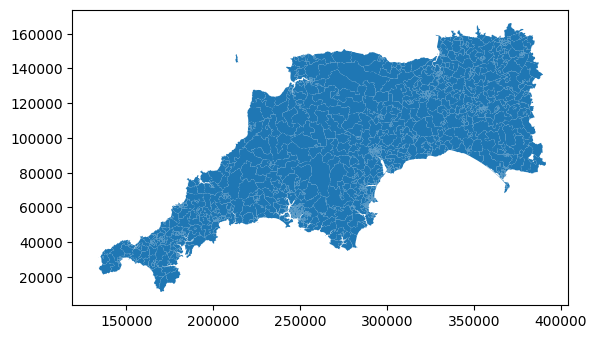

In [ ]:
import geopandas

# Import a file relating to the lower layer super output areas (LSOAs) 
# in South-West England
lsoa_gdf = geopandas.read_file(
    filename = "data/south_west_lsoa.zip", 
    crs='EPSG:27700'
    )

# Plot this dataframe
lsoa_gdf.plot()

This didn't take very much code at all, and yet we already have a map that is very recognisable as the South-West of England.

You might notice that we didn't have to tell geopandas what to plot - it just somehow knew. 

So what data is stored in this magic dataframe that we've loaded that allows it to output a map, and why can't we just use normal pandas for that?

To start with, let's take a look at the data we've just imported. What command can we use to find out what sort of object this is? 

In [ ]:
type(lsoa_gdf)

#____(lsoa_gdf)

geopandas.geodataframe.GeoDataFrame

It appears to be something called a GeoDataFrame - so that sounds like it will be similar to a normal dataframe. 

And it is! A lot of the methods we're used to using with pandas dataframes exist in geopandas too - so let's use our standard pandas command for looking at the names of the columns in our dataframe and their data types.

In [ ]:
lsoa_gdf.dtypes

# Hint - this is an *attribute* of 
# the dataframe - a property that exists as part of it, 
# rather than a *method* we are going to run on it - so 
# remember that for attributes you don't need any brackets 
# at the end of your code
#lsoa_gdf._______

objectid         int64
lsoa11cd        object
lsoa11nm        object
lsoa11nmw       object
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

Now, we seem to have some fairly normal columns - an identifier column that is an integer, for example, and some strings that give us a human-readable name for each of the lower super output areas, but what is this geometry column at the end? 

You can see that it actually has a type of 'geometry' too.

Let's take a peek at what this data actually looks like. 

Again, we can use our standard pandas commands. Let's take a look at the first five rows of data.

In [ ]:
lsoa_gdf.head()

# Your code here: load the first 5 rows of the geodataframe
# lsoa_gdf.___________

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry
0,13949,E01014379,Bath and North East Somerset 022A,Bath and North East Somerset 022A,3.562122e+07,40744.686723,"POLYGON ((371270.596 164231.895, 371284.906 16..."
1,13953,E01014383,Bath and North East Somerset 021B,Bath and North East Somerset 021B,1.869634e+07,38200.007842,"POLYGON ((353604.188 159531.796, 353605.860 15..."
2,13964,E01014394,Bath and North East Somerset 023B,Bath and North East Somerset 023B,7.343601e+06,20300.186471,"POLYGON ((361900.500 156839.703, 361905.406 15..."
3,13986,E01014418,Bath and North East Somerset 021D,Bath and North East Somerset 021D,1.927939e+07,22174.901713,"POLYGON ((355563.000 155271.406, 355559.218 15..."
4,13987,E01014419,Bath and North East Somerset 020C,Bath and North East Somerset 020C,6.594984e+06,13098.200105,"POLYGON ((362687.157 158469.429, 362687.412 15..."


It looks like this 'geometry' column has a fairly consistent structure for each row - a polygon. 

What's a polygon? It might not be something you come across often now, but it's a term you might remember if you cast your mind back to your school days.

It's a 2-dimensional (flat) shape made up of any number of straight lines. All of the edges must join together - there can't be any gaps. 
Polygons can be regular, like this...

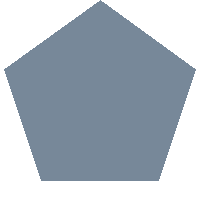

In [ ]:
from PIL import Image, ImageDraw
img = Image.new("RGBA", (200,200))
draw = ImageDraw.Draw(img)
draw.regular_polygon((100,100,100), 5, fill='lightslategray')
img.show()

Or they can be irregular, with the edges being different lengths and the angles being different too.

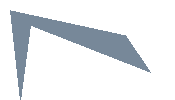

In [ ]:
img = Image.new("RGBA", (175,100))
draw = ImageDraw.Draw(img)
draw.polygon(((10,10), (20,100), (30,25), (150,72), (125,35)), fill='lightslategray')
img.show()

Now we've reminded ourselves of what a polygon is, let's take a closer look at just that 'geometry' column.

What can we put inside our square brackets to do this?

In [ ]:
lsoa_gdf['geometry']

#lsoa_gdf[________]

0       POLYGON ((371270.596 164231.895, 371284.906 16...
1       POLYGON ((353604.188 159531.796, 353605.860 15...
2       POLYGON ((361900.500 156839.703, 361905.406 15...
3       POLYGON ((355563.000 155271.406, 355559.218 15...
4       POLYGON ((362687.157 158469.429, 362687.412 15...
                              ...                        
1513    POLYGON ((296721.678 87619.293, 296722.500 876...
1514    MULTIPOLYGON (((193521.248 79685.787, 193515.4...
1515    POLYGON ((210926.551 85515.306, 210928.172 855...
1516    POLYGON ((210136.000 83461.000, 210136.660 834...
1517    POLYGON ((242031.538 55750.693, 242041.798 557...
Name: geometry, Length: 1518, dtype: geometry

Interesting - it seems to be a series of number pairs. But it gets cut off pretty quickly - it would be interesting to be able to read a bit more of a cell to understand what's going on.

Let's just pull out the geometry column for the first row.

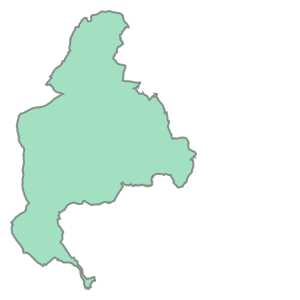

In [ ]:
lsoa_gdf.loc[0,'geometry']

# What command will give us the geometry column for the first row?
# Hint - .loc allows you to use column names instead of column indices
# lsoa_gdf.loc[____,____]

Now that's a bit unexpected! Rather than text, we seem to have automatically pulled a shape out of the dataframe.

And actually, looking back at the first few rows of data that we printed, we can see that this is apparently the shape of a region called Bath and North East Somerset 022A.

But we saw the beginning of some text when we 

In [ ]:
list(lsoa_gdf.loc[0,'geometry'].exterior.coords)

[(371270.5959999999, 164231.89499999955),
 (371284.9060000004, 164222.5940000005),
 (371292.5939999996, 164216.70299999975),
 (371298.1869999999, 164208.5),
 (371305.1610000003, 164202.0309999995),
 (371305.30900000036, 164201.8939999994),
 (371317.11199999973, 164195.08999999985),
 (371320.4610000001, 164193.1610000003),
 (371322.30599999987, 164192.0979999993),
 (371322.83800000045, 164191.7379999999),
 (371330.5939999996, 164186.5),
 (371332.31799999997, 164185.26999999955),
 (371332.61400000006, 164185.06000000052),
 (371338.5939999996, 164180.79700000025),
 (371347.2209999999, 164173.4330000002),
 (371348.0939999996, 164172.68799999915),
 (371349.2410000004, 164171.23399999924),
 (371357.3119999999, 164161.0),
 (371361.4060000004, 164154.5),
 (371364.5389999999, 164148.8990000002),
 (371365.03699999955, 164148.0089999996),
 (371365.0939999996, 164147.9059999995),
 (371368.5, 164140.0),
 (371365.5939999996, 164124.0940000005),
 (371367.02699999977, 164122.45900000073),
 (371377.593

Let's plot these coordinates in an interactive plot so we can get an understanding of how they work.

In [ ]:
import plotly.graph_objects as go 
import numpy as np

points = lsoa_gdf.loc[0,'geometry'].exterior.coords

xs = [point[0] for point in points]
ys = [point[1] for point in points]

fig = go.Figure(
    data = go.Scattergl(
        x = xs, 
        y = ys,
        mode='markers',
        marker=dict(
            color=np.random.randn(len(xs)),
            colorscale='Viridis',
            line_width=0,
            size=2
            )
        )
    )

fig.show()

But wait - didn't we just say that polygons were a series of striaght lines that all join together to make a shape with no gaps in its edges? 

Well, if you draw a straight line between each of these points, that's exactly what you get!

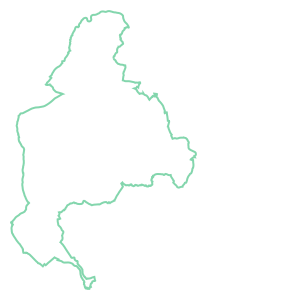

In [ ]:
lsoa_gdf.loc[0,'geometry'].boundary

The closer the points are together, the more accurate (and wiggly) the boundary will appear 

## Why can't I just use normal pandas for this? 

So if the geometry is just a series of numbers, just like anything else, what's to stop us from just using pandas? We might not get this magic plotting, but are there any other downsides?

Let's see what happens if we just try to import this file with pandas instead?

Well, looking back at our file, it's actually a zip file - this means it's a single file that contains several other files or folders in a compressed format. 
This saves space, but also makes it easier to send around. 

So let's see what's in our zip file - is it something pandas can read?

In [ ]:
import zipfile
with zipfile.ZipFile("data/south_west_lsoa.zip", 'r') as zip_file:
   file_list = zip_file.namelist()
   print("The file list are:",file_list)

The file list are: ['south_west_lsoa.cpg', 'south_west_lsoa.dbf', 'south_west_lsoa.prj', 'south_west_lsoa.shp', 'south_west_lsoa.shx']


None of those look like files we're used to importing into pandas! 
We would usually work with .csv (comma separated value) files or .xlsx (Excel) files. 

In fact, what we have above all together make up something called a shapefile. 

This is a special geographic data format that is often exported from GIS (geographic information systems) software, such as ArcGIS or QGIS.

So even though the table we end up with from geopandas looks a lot like a standard pandas dataframe, it's doing some clever stuff behind the scenes to read the shapefile and turn it into something that is easy for us to work with.  

## So how does geopandas know what column to plot without me telling it?

Thinking back to Pandas, we have series - our columns of data - that are joined together to make a DataFrame. 

A GeoDataFrame can contain lots of series, but what makes it special is that it will always contain at least one GeoSeries column. 

This is called the geometry - regardless of what the actual column name is (though it'll often actually be called 'geometry' too if you're importing a standard sort of geo data file. 

So when we call certain commands, like 'plot', on a GeoDataFrame, geopandas knows which column it needs to look at without us telling it. 

Along with plotting, which we looked at at the beginning, it can do all sorts of other things automatically with the geometry column. For example, we can call the 'centroid' method to calculate the central point of every polygon.

In [ ]:
lsoa_gdf.centroid

0       POINT (370377.160 161017.106)
1       POINT (353541.396 159558.210)
2       POINT (363537.984 156514.068)
3       POINT (357584.171 156432.473)
4       POINT (361295.947 157729.907)
                    ...              
1513     POINT (297053.893 87731.361)
1514     POINT (195610.732 77291.078)
1515     POINT (209693.740 83215.852)
1516     POINT (210251.780 83257.874)
1517     POINT (242030.406 55067.832)
Length: 1518, dtype: geometry

And we can plot these too!

<AxesSubplot: >

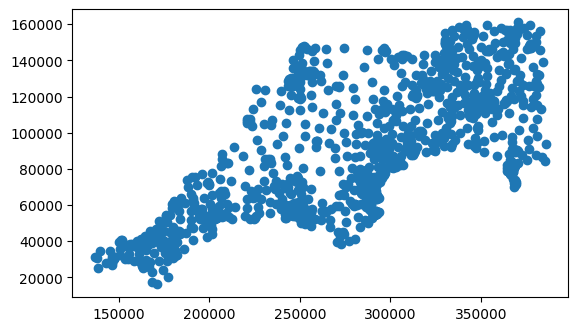

In [ ]:
lsoa_gdf.centroid.plot()

But hang on - these aren't polygons anymore. These are now points - is this geometry too?

## Other Kinds of Geometry

If we take a look at the geopandas documentation, we can see that there are a couple of different types of geometry that the package supports. 

> "A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

> GeoPandas has three basic classes of geometric objects (which are actually shapely objects):
> - Points / Multi-Points
> - Lines / Multi-Lines
> - Polygons / Multi-Polygons

> Note that all entries in a GeoSeries need not be of the same geometric type, although certain export operations will fail if this is not the case."

- [The GeoPandas User Guide](https://geopandas.org/en/stable/docs/user_guide/data_structures.html)

Let's look at some examples of other types of geometry.

In [ ]:
import geodatasets

cleveland = geopandas.read_file(geodatasets.get_path('geoda.cleveland'))

cleveland['geometry']

0      POINT (2177340.000 663165.000)
1      POINT (2177090.000 662872.000)
2      POINT (2182100.000 663462.000)
3      POINT (2181090.000 663162.000)
4      POINT (2181090.000 663380.000)
                    ...              
200    POINT (2197940.000 651658.000)
201    POINT (2197980.000 650820.000)
202    POINT (2199300.000 650213.000)
203    POINT (2199300.000 649849.000)
204    POINT (2201050.000 650777.000)
Name: geometry, Length: 205, dtype: geometry

Unlike the polygons, we can see that each 'POINT' is just a single pair of coordinates.

We can then plot these with the same method as before. 

However, this time it doesn't feel very useful - even if you're familiar with the location, which is Cleveland, Ohio, USA.

<AxesSubplot: >

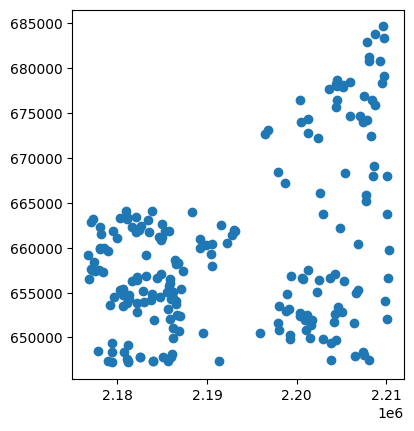

In [ ]:
cleveland.plot()

We can solve this by using the contextily library to add a basemap to our plot. 

The basemap in the plot below is the 

It's important that we tell contextily what coordinate reference system (CRS) we are using. 
In this case, this is an attribute of the GeoDataFrame.

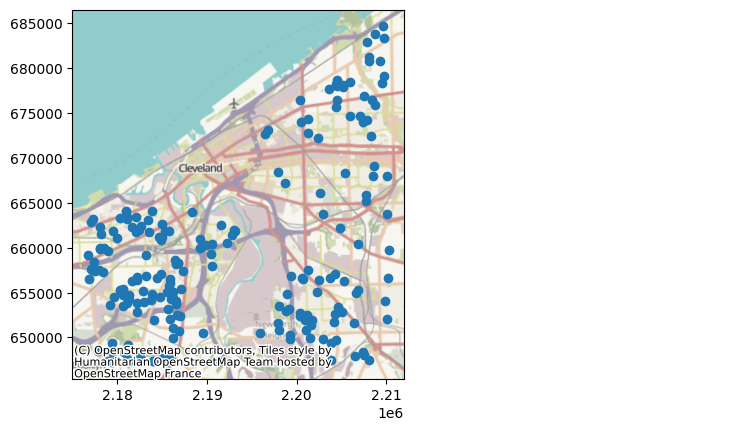

In [ ]:
import contextily as cx
ax = cleveland.plot()
cx.add_basemap(ax, crs=cleveland.crs.to_string(), zoom=12)

Finally, let's take a look at some line data. 

This is less common - and you might have to set it up yourself for your own datasets (which we will cover elsewhere. 

But line data can be really useful for things like journeys - where there's a specific start and end point for each journey, but the route - or even just representing the start and end point - matters. 


This might be something you use when looking at 
- where people travel from when accessing a particular clinic
- where people travel to and from routinely 

In [ ]:
large_rivers = geopandas.read_file(geodatasets.get_path('eea.large_rivers'))

large_rivers.head()


,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((4185683.289 2775788.039, 418..."
1,Douro,8.162452e+05,"MULTILINESTRING ((2764963.810 2199037.624, 276..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((3178371.814 2315100.781, 317..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((4235352.373 3422319.986, 423..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((2859329.283 1682737.074, 286..."


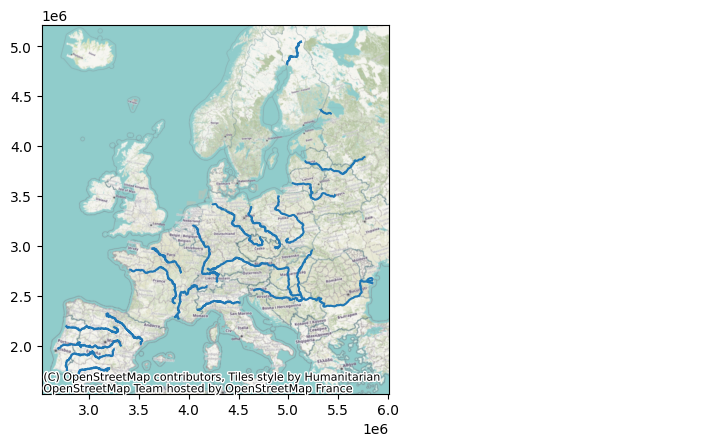

In [ ]:
ax = large_rivers.plot()
cx.add_basemap(ax, crs=large_rivers.crs.to_string(), zoom=5)

In [ ]:
large_rivers['geometry']

0     MULTILINESTRING ((4185683.289 2775788.039, 418...
1     MULTILINESTRING ((2764963.810 2199037.624, 276...
2     MULTILINESTRING ((3178371.814 2315100.781, 317...
3     MULTILINESTRING ((4235352.373 3422319.986, 423...
4     MULTILINESTRING ((2859329.283 1682737.074, 286...
5     MULTILINESTRING ((2778234.118 1742652.788, 277...
6     LINESTRING (3404499.643 2762382.497, 3421698.5...
7     LINESTRING (5035572.495 3631760.803, 5047544.3...
8     MULTILINESTRING ((4624553.768 3398503.656, 462...
9     MULTILINESTRING ((4042308.092 3212055.887, 404...
10    MULTILINESTRING ((3866903.559 2277016.182, 386...
11    LINESTRING (4648216.125 2547140.513, 4661823.0...
12    LINESTRING (3624993.844 2971660.167, 3627034.2...
13    MULTILINESTRING ((2683612.346 1965395.243, 268...
14    MULTILINESTRING ((5106263.501 2750642.311, 510...
15    LINESTRING (4901008.720 3506465.269, 4900222.8...
16    LINESTRING (5166748.233 3856621.242, 5169999.8...
17    LINESTRING (4082279.504 2357066.303, 40825

You can see we have a mixture of geometry types here - lines and multilines. 

A multiline is just more than one line stored within a single row!

This might be useful if, for example, the river has smaller tributaries that we want to show. If we wanted this to all be a single line, we'd have to draw over the 

The example below - row 13, which is the river Danube - is a multilinestring. 

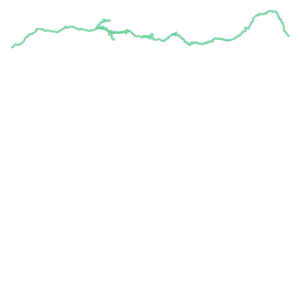

In [ ]:
large_rivers.geometry[13]

While it looks like a single line when plotted, in fact we can loop through each line within the multiline and plot them separately. Below, each colour represents a different line within the multiline geometry.

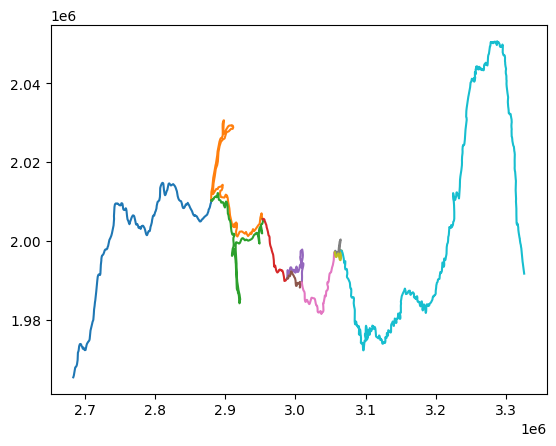

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(large_rivers.geometry[13].geoms)):
    plt.plot(large_rivers.geometry[13].geoms[i].xy[0], large_rivers.geometry[13].geoms[i].xy[1])
    

If we break it down, we can see some of the additional smaller lines that branch off

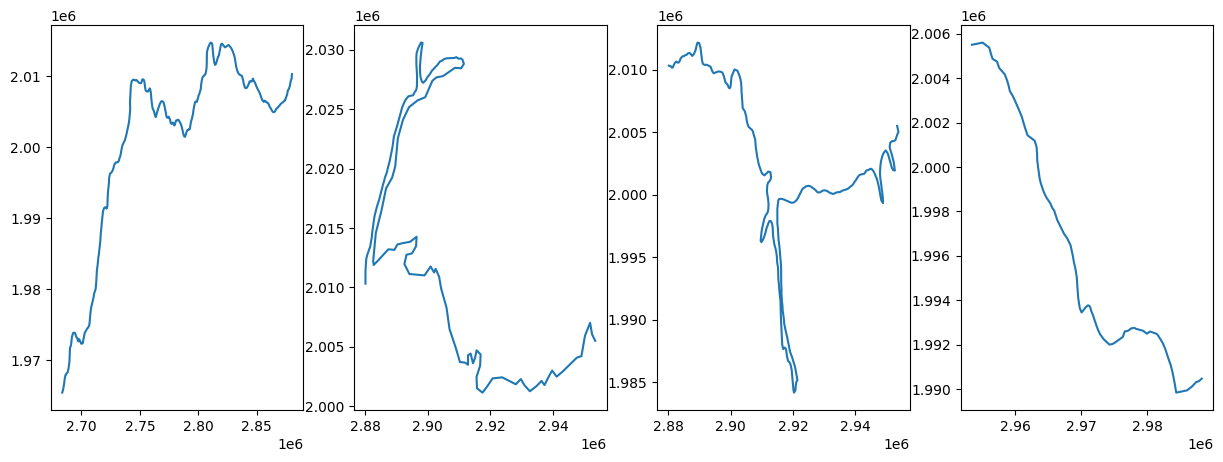

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False, figsize=(15, 5))
ax1.plot(large_rivers.geometry[13].geoms[0].xy[0], large_rivers.geometry[13].geoms[0].xy[1])
ax2.plot(large_rivers.geometry[13].geoms[1].xy[0], large_rivers.geometry[13].geoms[1].xy[1])
ax3.plot(large_rivers.geometry[13].geoms[2].xy[0], large_rivers.geometry[13].geoms[2].xy[1])
ax4.plot(large_rivers.geometry[13].geoms[3].xy[0], large_rivers.geometry[13].geoms[3].xy[1])

Whereas this row - the river Loire - is a linestring, meaning there's just one single continuous line with no offshoots.

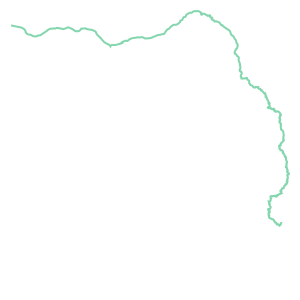

In [ ]:
large_rivers['geometry'][6]

## So what's the point of all this geometry?

By itself, the geometry isn't very exciting. 

However - without it, it's impossible for us to accurately work with our geographic data and place it into maps that are interpretable. 

Let's return to one of the geodataframes from earlier and take a bit of a look at what's in it.

In [ ]:
cleveland.head()

,unique_id,parcel,x,y,sale_price,tract10int,Quarter,year1,yrquarter,geometry
0,1183,002-02-036,2177340,663165,235500,101200,4,2015,154,POINT (2177340.000 663165.000)
1,1198,002-02-053,2177090,662872,65000,101200,4,2015,154,POINT (2177090.000 662872.000)
2,1516,002-14-053,2182100,663462,92000,103500,4,2015,154,POINT (2182100.000 663462.000)
3,1606,002-15-038,2181090,663162,5000,103400,4,2015,154,POINT (2181090.000 663162.000)
4,1612,002-15-043,2181090,663380,116250,103400,4,2015,154,POINT (2181090.000 663380.000)


In our cleveland GeoDataFrame, we can see that there's a column called 'sale_price'. 

Text(0.5, 1.0, 'Sale prices of houses is Cleveland, Ohio ($)')

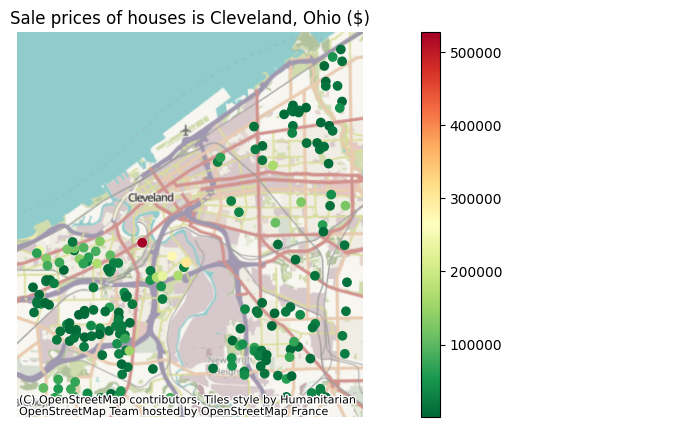

In [ ]:
ax = cleveland.plot("sale_price", cmap="RdYlGn_r", figsize=(15, 5), legend=True)
cx.add_basemap(ax, crs=cleveland.crs.to_string(), zoom=12)
ax.axis('off')
plt.title("Sale prices of houses is Cleveland, Ohio ($)")

And we can also create similar maps showing the value of an indicator for an area - a type of visualisation called a choropleth. 

In [ ]:
# Read in a sample dataset of health indicators from the geodatasets package
health = geopandas.read_file(geodatasets.get_path('geoda.health_indicators'))

# Create a plot from the health geodataframe using geopandas built-in plot method
ax = health.plot(
    "Prete_rths", # Tell the plot method what column we are interested in plotting the values from
    cmap="RdYlGn_r", # Set the colour map from the matplotlib default palettes
    figsize=(15, 5), # Set the width and height of the output
    alpha=0.6, # Set how see-through the coloured layer will be
    legend=True # Generate a legend for the measure we are visualising
    )

# Use the contextily (cx) package to add a basemap    
cx.add_basemap(
    ax, # Add the basemap to the plot we made above rather than a new plot
    crs=health.crs.to_string(), # Take the coordinate reference system metadata from the health gdf
    zoom=15 # Tell it how zoomed in we want the basemap to be
    )

# Add a title to our map
plt.title("% of births classed as pre-term in Colorado")
# Turn off the numbers and axis tick marks around the edge of the map
ax.axis('off')

Where geopandas and python become really powerful is when you start adding in loops - we can create 25 maps, all covering different indicators, with just the code below!

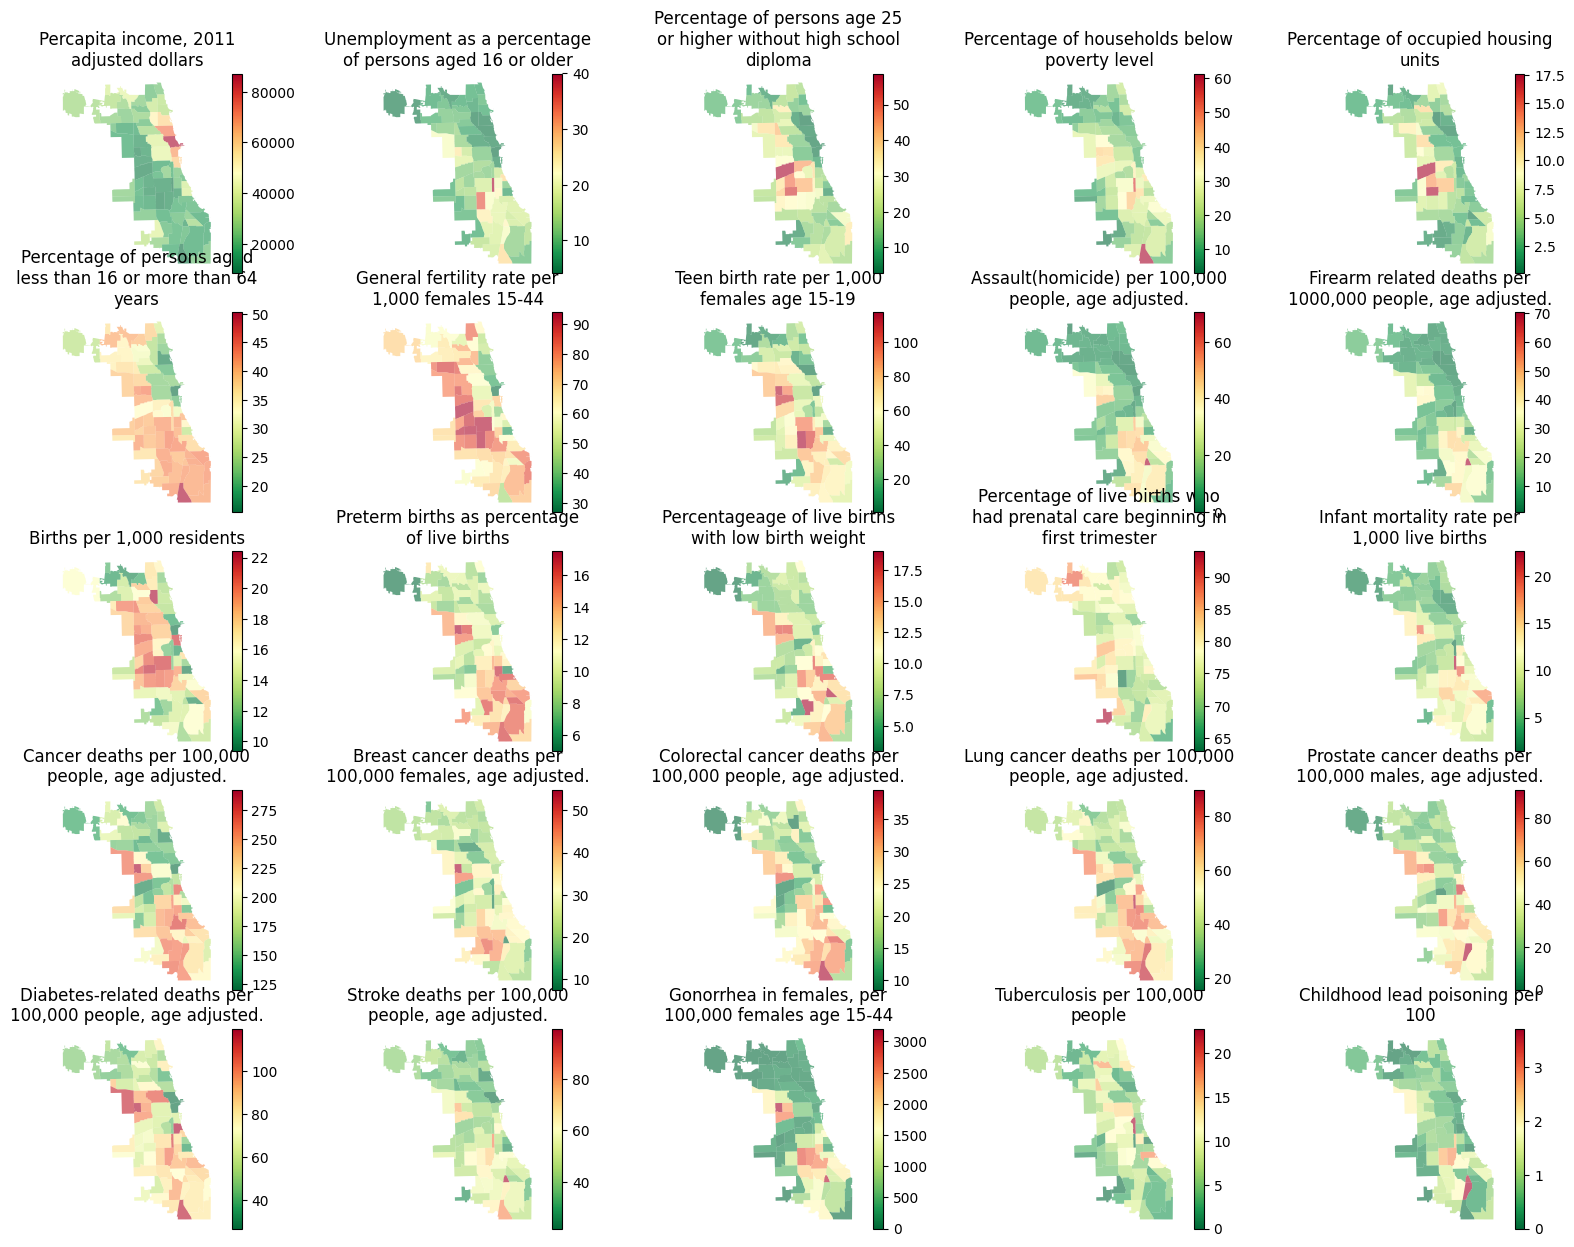

In [ ]:
import pandas as pd
import textwrap

cols = ['PerCa_come', 'Unemp_ment', 'NoHig_loma', 'Below_evel',  'Crowd_sing', 
        'Dependency', 'Gener_Rate', 'TeenB_Rate', 'Assau_cide', 'Firea_ated',
        'BirthRate', 'Prete_rths', 'LowBi_ight', 'Prena_ster', 'Infan_Rate', 
        'Cance_ites', 'Breas_ales', 'Color_ncer', 'LungCancer', 'Prost_ales', 
        'Diabe_ated', 'Strok_ease','Gonor_ales', 'Tuber_osis', 'Chil_ing_1',]

colnames = pd.read_csv('data/health_indicators_human_readable_names.csv')

fig, axs = plt.subplots(5, 5, figsize=(20, 15))
for i, ax in enumerate(fig.axes):
    health.plot(cols[i], cmap="RdYlGn_r", alpha=0.6, legend=True, ax=ax)
    ax.axis('off')
    formatted_title = colnames[colnames['Variable']==cols[i]].Description.values[0]
    ax.title.set_text(textwrap.fill(formatted_title, 30))

In the next notebook, we will work with a range of datasets and geometry data to make lots of different maps. 

You will learn how to:
- join your own datasets to geometry files
- colour points and polygons to show patterns
- polish the appearance of your maps so they are ready to include in reports

and much more. By the end, you will be able to 

In the notebook after that, we will explore how to do the same things (and much more) in a range of interactive libraries.

## So where do we get all this geometry from? 

### 

### Polygons

When you are working with a dataset - whether it's the postcodes of patients with a particular disease, the location of crimes, or anything else coming from a data warehouse, it's unlikely you're going to be getting it as some sort of geometry file. 

Instead, what you will need to do is find a geometry file from somewhere like the office of national statistics. 

Then you can start to look at linking the data from your own datasets up to this geometry file - a very flexible approach! 
You'll find you can use the same base geometry files again and again when you start your analyses. 

But when you then get to  

# Now it's your turn...

## Exercise 1

In this exercise, you are going to experiment with loading some data in and plotting it with the geopandas plot method.

Step 1: Load in the data using geopandas

Step 2: 

## Exercise 2

Now we're going to push your GeoPandas skills a bit further by getting you to use some more of your pandas skills. 

This time, you're going to import the data, filter it

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c661ea7-9b58-4649-92ed-c2a834b4f69c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>